In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0001_00156_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

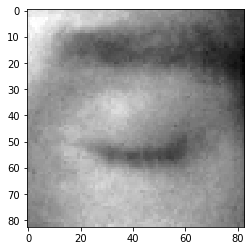

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(83, 83)

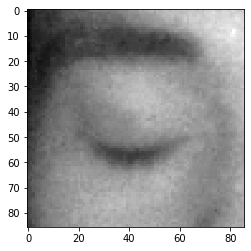

In [5]:
Datadirectory = "Test_Dataset/" ## training dataset
Classes = ["Closed_Eyes","Open_Eyes"] ## List of classes
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

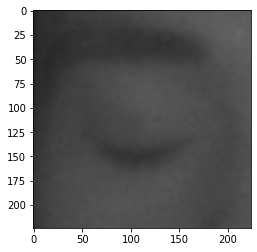

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# reading all the images and converting them into an array for data and labels

In [7]:
training_Data = []

def create_training_Data():
    for Category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

1056


In [10]:
# to avoid overfitting

import random

random.shuffle(training_Data)

In [11]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(1056, 224, 224, 3)

In [13]:
# normalize the data
X = X/255.0;

In [14]:
Y = np.array(y)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Deep Learing model for training - "Transfer Learning"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Transfer Learning

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node (1/0)
final_ouput = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# settings for the binary classification (open/closed)

In [25]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
new_model.fit(X,Y, epochs = 5, validation_split = 0.1)

Epoch 1/5
30/30 [==============================] - 101s 3s/step - loss: 15.2492 - accuracy: 0.0000e+00 - val_loss: 14.1714 - val_accuracy: 0.0000e+00
Epoch 2/5
30/30 [==============================] - 93s 3s/step - loss: 15.2492 - accuracy: 0.0000e+00 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 3/5
30/30 [==============================] - 89s 3s/step - loss: 15.2492 - accuracy: 0.0000e+00 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 4/5
30/30 [==============================] - 88s 3s/step - loss: 15.2492 - accuracy: 0.0000e+00 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 5/5
30/30 [==============================] - 88s 3s/step - loss: 15.2351 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 1.0000


In [27]:
new_model.save('my_model.h5')

# Checking the network for predictions

In [28]:
img_array = cv2.imread('s0012_00027_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [29]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [30]:
X_input.shape

(1, 224, 224, 3)

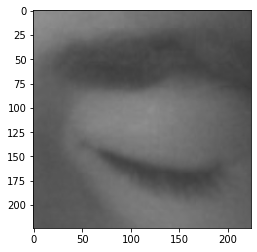

In [31]:
plt.imshow(new_array)

In [32]:
X_input = X_input/255.0

In [33]:
prediction = new_model.predict(X_input)

In [34]:
prediction

array([[-2.4217725]], dtype=float32)

# predicting from unknown image

In [35]:
img = cv2.imread("random1.jpg")

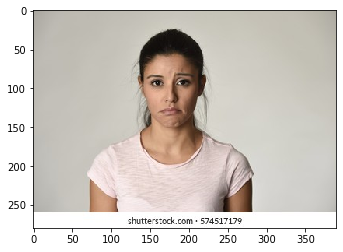

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [38]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [40]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [41]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

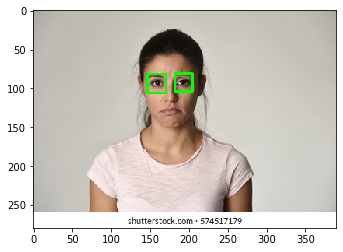

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# cropping the eye from face 

In [43]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# print(faceCascade.empty())

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

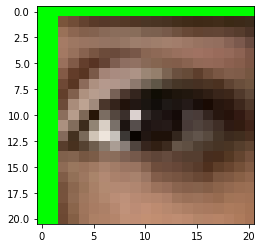

In [44]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [45]:
eyes_roi.shape

(21, 21, 3)

In [46]:
final_image=cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image = final_image/255.0

In [47]:
final_image.shape

(1, 224, 224, 3)

In [48]:
new_model.predict(final_image)

array([[-1.2722437]], dtype=float32)

# loading the saved model

In [3]:
new_model = tf.keras.models.load_model('my_model.h5')

In [5]:
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#cap = cv2.VideoCapture(1)
#check if webcam is opened correctly
#if not cap.isOpened():
 #   cap = cv2.VideoCapture(0)
#if not cap.isOpened():
 #   raise IOError("Cannot open webcam")

cap = cv2.VideoCapture(0)    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
        
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw a rectangle around the faces
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # use putText() method for
    # inserting text on video
    cv2.putText(frame,
               status,
               (50,50),
               font, 3,
               (0,0,255),
               2,
               cv2.LINE_4)
    cv2.imshow('Drowsiness Detection System',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

False
False
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
False
eyes are not detected
False


# alarm alert if closed for few sec

In [7]:
import winsound
frequency = 2500 # set frequency to 2500 Hertz
duration = 1000 # set Duration to 1000 ms == 1 second

import numpy as np
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#cap = cv2.VideoCapture(1)
#check if webcam is opened correctly
#if not cap.isOpened():
 #   cap = cv2.VideoCapture(0)
#if not cap.isOpened():
 #   raise IOError("Cannot open webcam")

cap = cv2.VideoCapture(0)    
counter = 0
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,
               status,
               (150,150),
               font, 3,
               (0,0,255),
               2,
               cv2.LINE_4)
        
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
               status,
               (150,150),
               font, 3,
               (0,0,255),
               2,
               cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
        
        if counter>5:
            
            x1,y1,w1,h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
            #Add text
            cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0), 2)
            winsound.Beep(frequency, duration)
            counter = 0
        
        
    
    cv2.imshow('Drowsiness Detection System',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
